# Data Visualizations

In this notebook, I create the required data visualizations to analyse the various aspects of my analysis.

The visualizations included in this notebook are:

1. **Histogram of Wildfires by Distance from Mesa, AZ (Up to 1800 Miles)**: This plot shows the number of wildfires occurring at every 50-mile interval from Mesa, AZ, up to 1800 miles. It also highlights the 650-mile cut-off used for modeling wildfire impacts on the city.
   
2. **Time Series of Total Acres Burned Per Year Within 650 Miles of Mesa, AZ**: This graph displays the total acres burned per year for wildfires occurring within 650 miles of Mesa, AZ.

3. **Time Series of Wildfire Smoke Estimates and AQI for Mesa, AZ (1964-2024)**: This time series graph compares the annual wildfire smoke estimates calculated for Mesa, AZ, with the calculated yearly average EPA's Air Quality Index (AQI) data from 1964 to 2024. 

In [17]:
#
#    IMPORTS
#

#    These are standard python modules. In case you do not have a python module, you should use `!pip install <module>`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [18]:
# Load the data
complete_wildfire_data = pd.read_csv("../Processed Data/complete_wildfires_with_distances.csv")
smoke_estimate_aqi_data = pd.read_csv("../Processed Data/smoke_estimate_with_year_aqi.csv")

### Visualization 1: Histogram of Wildfires by Distance from Mesa, AZ (Up to 1800 Miles)

This histogram shows the number of wildfires occurring at every 50-mile interval from Mesa, AZ, for all fires within a range of 1800 miles. The distance cut-off used for the modeling work (650 miles) is indicated in the plot.

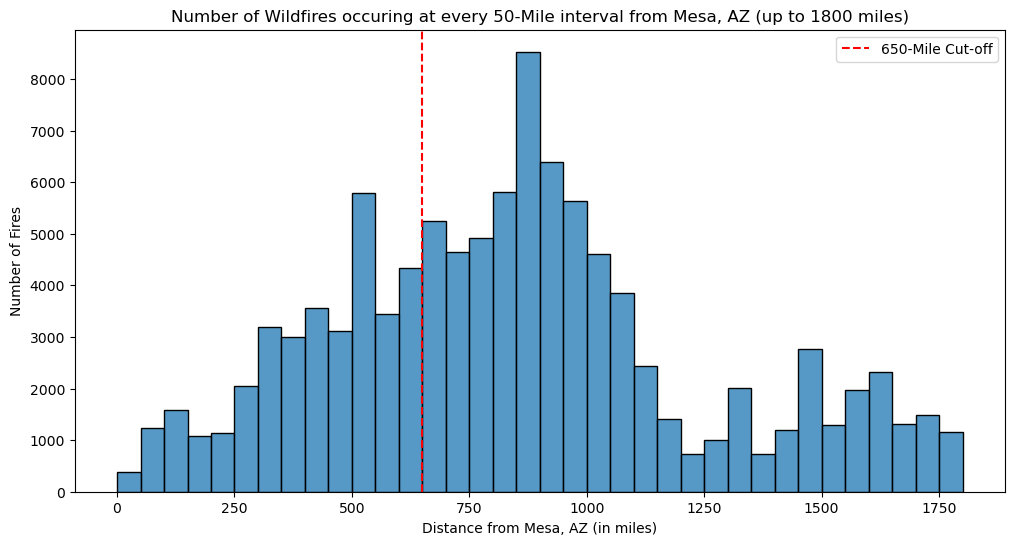

In [24]:
# Here I filter data for fires within 1800 miles of Mesa, AZ (I use the complete_wildfire_data file since the other one was already filtered to 650 miles)
mesa_fires = complete_wildfire_data[complete_wildfire_data['Min_Distance'] <= 1800]

# Create a histogram with 50-mile bins
plt.figure(figsize=(12, 6))
sns.histplot(mesa_fires['Min_Distance'], bins=range(0, 1801, 50))

# Add a vertical line to indicate the 650-mile cut-off
plt.axvline(x=650, color='red', linestyle='--', label='650-Mile Cut-off')
plt.xlabel('Distance from Mesa, AZ (in miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Wildfires occuring at every 50-Mile interval from Mesa, AZ (up to 1800 miles)')
plt.legend()
plt.savefig("../Output Files/Visualization 1.jpg", dpi=300)
plt.show()


We can see that the histogram above shows a notable peak of approximately 8,500 fires occurring around 850-900 miles from Mesa, AZ. This shows that there is likely a more wildfire prone around that distance. The distribution is also particularly interesting as it shows multiple distinct peaks with a significant secondary peak around 500-550 miles. I also think that because of the division line at 650 miles, it seems like a lot of fires are not that close to Mesa, AZ to actually affect it very negatively.

### Visualization 2: Time Series of Total Acres Burned Per Year Within 650 Miles of Mesa, AZ

This time series graph shows the total acres burned per year for wildfires that occurred within 650 miles of Mesa, AZ, from 1964 to 2020. (It is 2020, since that is all the data I could gather from the USGS website).

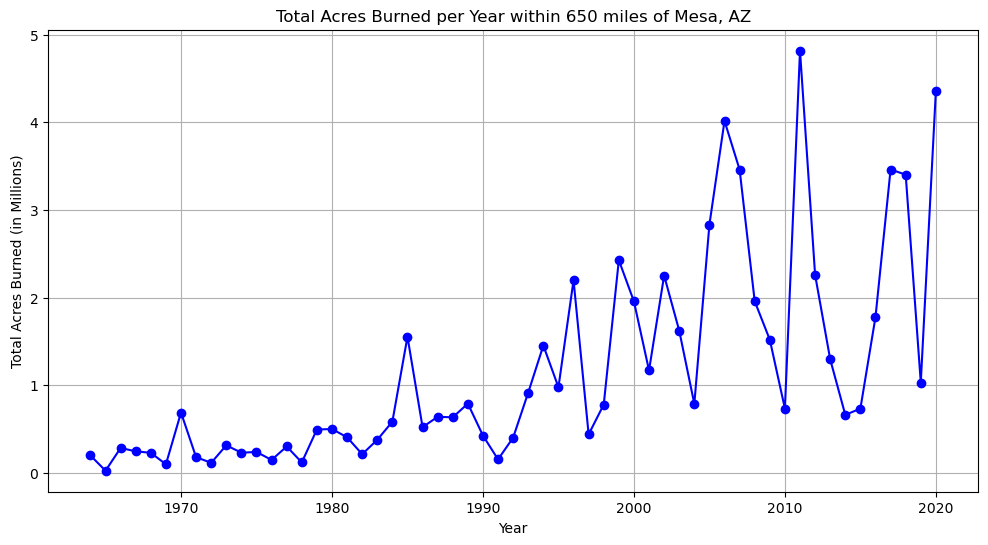

In [25]:
# Here I filter data for fires within 650 miles of Mesa, AZ
mesa_fires_650 = complete_wildfire_data[complete_wildfire_data['Min_Distance'] <= 650]

# Next, I group by year and calculate total acres burned
acres_burned_by_year = mesa_fires_650.groupby('Fire_Year')['GIS_Acres'].sum() / 1_000_000
#print(acres_burned_by_year)

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(acres_burned_by_year.index, acres_burned_by_year.values, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned (in Millions)')
plt.title('Total Acres Burned per Year within 650 miles of Mesa, AZ')
plt.grid(True)
plt.savefig("../Output Files/Visualization 2.jpg", dpi=300)
plt.show()

From the above chart, we can see a striking shift in wildfire patterns over the years. We see that from 1965 to 1990, burned acreage remained relatively stable and low, but post-1990, we observe a dramatic increase in both intensity and volatility. It is also interesting to see that the last 20 years, particularly 2011 and 2006 had really large areas burned. In my view, these patterns suggest significant changes in fire severity and frequency in recent decades, possibly indicating shifts in climate patterns.

### Visualization 3: Time Series of Wildfire Smoke Estimates and AQI for Mesa, AZ (1964-2024)

This time series graph compares the annual wildfire smoke estimates calculated for Mesa, AZ, with the calculated yearly average EPA's Air Quality Index (AQI) data from 1964 to 2024.

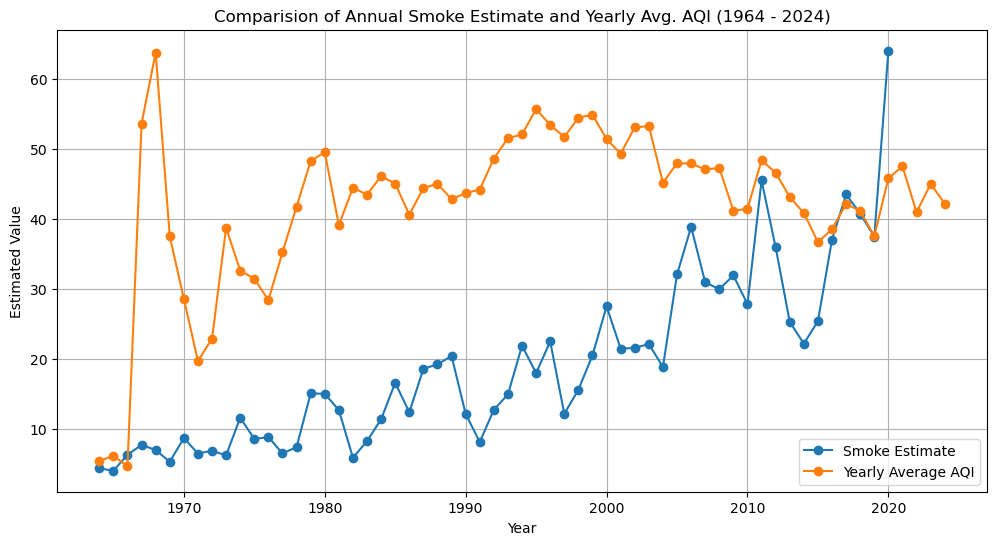

In [26]:
plt.figure(figsize=(12, 6))

# Plot time series graph
# First I plot the Smoke_Estimate
plt.plot(smoke_estimate_aqi_data['Fire_Year'], smoke_estimate_aqi_data['Smoke_Estimate'], label='Smoke Estimate', marker='o', linestyle='-')

# Next I plot the yearly_avg_aqi Estimate
plt.plot(smoke_estimate_aqi_data['Fire_Year'], smoke_estimate_aqi_data['yearly_avg_aqi'], label='Yearly Average AQI', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Estimated Value')
plt.title('Comparision of Annual Smoke Estimate and Yearly Avg. AQI (1964 - 2024)')
plt.legend()
plt.grid(True)
plt.savefig("../Output Files/Visualization 3.jpg", dpi=300)
plt.show()

Based on the diagram above, we see that the smoke estimate and the yearly average AQI exhibit both similarities and divergences over time. In certain periods, such as between the late 1960s and early 2000s, the two lines follow similar upward trends, suggesting that higher smoke estimates due to fire activity correlate with increased AQI values. However, there are also notable periods where the two lines diverge significantly. For instance, after 2010, the smoke estimate rises sharply, peaking around 2020, while the AQI remains relatively stable. This divergence could indicate that while fire characteristics (proximity, size, and type used to calculate smoke estimate) suggest a higher potential for smoke impact, other environmental factors—such as wind direction, precipitation, or atmospheric conditions—might have mitigated the actual air quality effects.